# MUSA 650 Homework 1: Basics of Machine Learning

**Team: Neve Zhang and Ziyi Guo**

*Disclaimer*: We consulted the following AI tool to revise codes for this project.
- OpenAI. (2025). ChatGPT (Jan 26 version) [Large language model]. https://chat.openai.com/chat.

## 1. Data Exploration

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from collections import Counter
from scipy.spatial.distance import euclidean

In [2]:
np.random.seed(2)  
import random
random.seed(2)  

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.1 Dimensionality

*What is the type of the training and testing datasets?*

**Ans**: The datasets are NumPy arrays containing the image data.

In [4]:
print(f"Type of x_train: {type(x_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of x_test: {type(x_test)}")
print(f"Type of y_test: {type(y_test)}")

Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>


*How many features are in the training dataset? The testing dataset? How many samples are in each dataset?*

**Ans**: The training set has 60000 samples, each gives 784 (28x28) features. The testing set has 10000 samples, each gives 784 (28x28) features.

In [5]:
print(f"Training set shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing set shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training set shape: (60000, 28, 28), Labels shape: (60000,)
Testing set shape: (10000, 28, 28), Labels shape: (10000,)


*If an array has a shape of `(100, 28, 28)`, what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?*

**Ans**: As previously noted, 100 represents the number of images, while 28x28 represents the number of pixels. As shown below, it would change to (number of samples - 100 in this case, 784) once flattened.

In [6]:
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
print(f"Reshaped training set shape: {x_train_reshaped.shape}")

Reshaped training set shape: (60000, 784)


*How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how `flatten()` and `reshape()` can be used for this purpose.*

**Ans**: Comparing results using `reshaped()` vs `flattened()`, `flatten()` converts an entire array into a 1D array, which does not preserve samples. While `reshape()` allows transformation of a 3D array into a 2D array, while preserving the number of samples.

In [7]:
x_train_flattened = x_train.flatten()
print("Flattened training set shape:", x_train_flattened.shape)

Flattened training set shape: (47040000,)


*Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)*

**Ans**: An image is represented by pixels, width and height, as well as multiple channels denoting colors (BW, RGB etc.). The primary goal of reshaping an image array into a vector is to prepare and simplify it for algorithm feeding. By performing reshaping, the input data will have a consistent and well-defined format, which helps to smoothen machine learning, enhance the process of model building, and reduce the amount of storage / memory required. 

Sources: 
- Reshaping of images data [https://community.deeplearning.ai/t/reshaping-of-images-data/261449]
- Reshaping input images for DL models [https://medium.com/@mabrouka.abuhmida/reshaping-input-images-for-dl-models-1fd238410f00]

### 1.2 Visualization

*Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.*

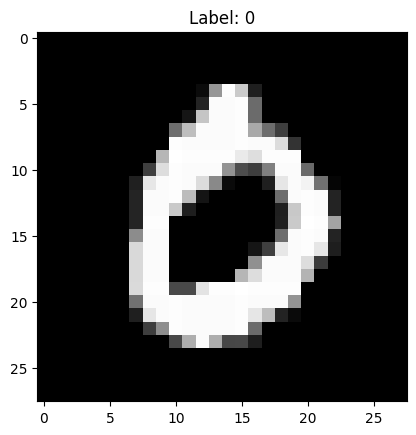

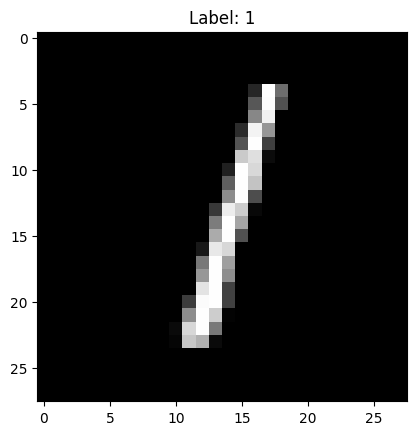

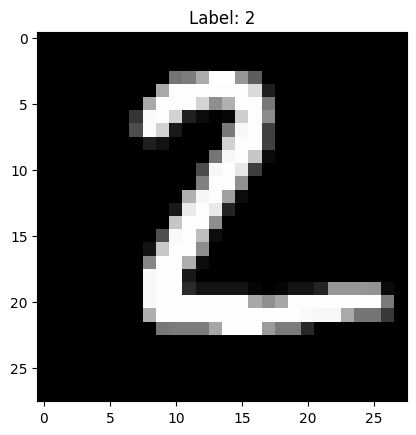

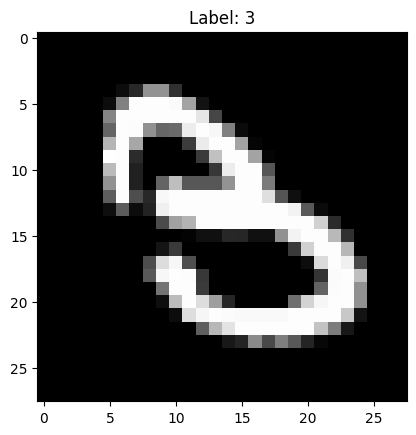

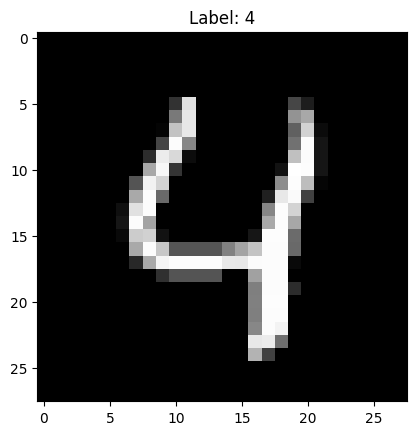

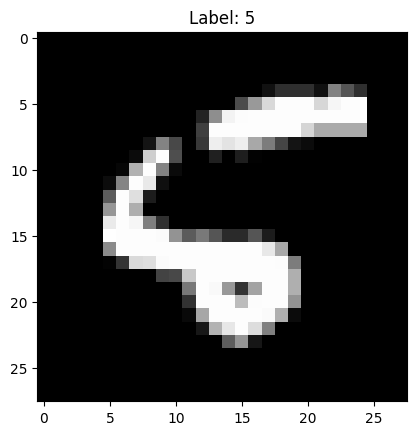

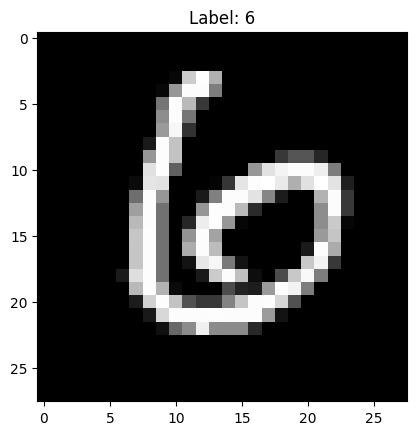

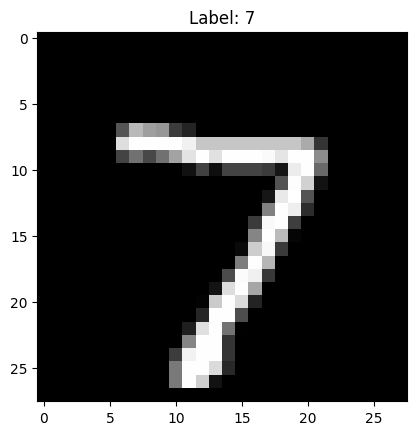

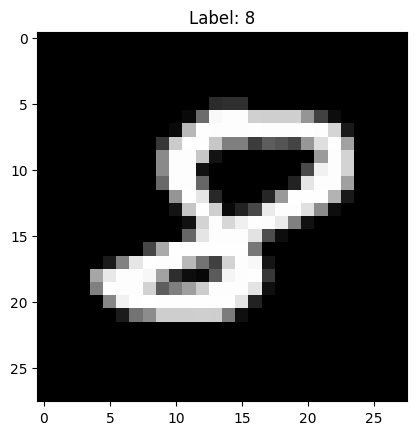

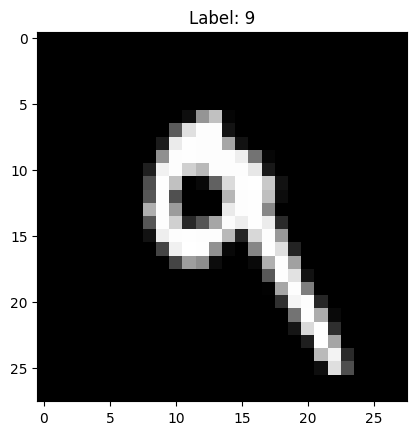

In [8]:
unique_labels = np.unique(y_test)

# Visualize the first occurrence in each label category
for label in unique_labels:
    idx = np.where(y_test == label)[0][0] 
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

## 2. Data Processing

### 2.1 Subsetting

*Create a 10% random subset of each training and testing set.* 

*What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?*

**Ans**: The distribution of each label in the reduced train data is 1: 691, 0: 613, 3: 611, 7: 610, 4: 600, 8: 590, 6: 585, 2: 569, 9: 569, 5: 562.

In [9]:
sample_size = int(0.1 * len(x_train))
random_indices = np.random.choice(len(x_train), sample_size, replace=False)

x_train_subset = x_train[random_indices]
y_train_subset = y_train[random_indices]

In [10]:
print(f"Full dataset label distribution: {Counter(y_train)}")
print(f"Random 10% training subset label distribution: {Counter(y_train_subset)}")

Full dataset label distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Random 10% training subset label distribution: Counter({1: 691, 0: 613, 3: 611, 7: 610, 4: 600, 8: 590, 6: 585, 2: 569, 9: 569, 5: 562})


*Now subset the **first** 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?*

**Ans**: The distribution of each label in the reduced train data is 1: 671, 7: 651, 4: 623, 3: 608, 6: 608, 9: 601, 0: 592, 2: 581, 8: 551, 5: 514.

In [11]:
# Find the first 10% subset
x_train_first = x_train[:sample_size]
y_train_first = y_train[:sample_size]

In [12]:
print(f"First 10% training subset label distribution: {Counter(y_train_first)}")

First 10% training subset label distribution: Counter({1: 671, 7: 651, 4: 623, 3: 608, 6: 608, 9: 601, 0: 592, 2: 581, 8: 551, 5: 514})


*When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?*

**Ans**: The main difference is the number of labels in each category in the selected sample, which is proved by the subsets we selected. Compared to the first 10% subset of the training dataset, the distribution of labels in the random 10% subset is more balanced with a smaller range (562-691). The first 10% subset is also a fixed set while the random subset is subject to more variations.

*Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.*

**Ans**: Based on past experience with reduced datasets, the primary benefits include expediting the analysis and model-building process due to reduced memory requirements, enabling efficient pilot testing, and facilitating resampling when observations are imbalanced (e.g., in a transportation project for quantitative planning, where the number of auto trips significantly exceeded biking trips). However, the trade-offs include the loss of comprehensive information (including rare incidents), reduced generalizability, and the potential introduction of biases.

### 2.2 Feature Engineering

*What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?*

**Ans**: The features are input data that we feed into the algorithm (in this assignment, pixel values), and outcomes are the ground truth that the model is trained to predict (in this assignment, digital labels whether an image is in a particular category from 0 to 9). Distinguishing the two helps us understand the logical process and goals of performing the machine learning, ensuring that we are oriented to find the function which maps the input to output.

*Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets.*

**Ans**: Although we expected the images of the training datasets to be smoother due to a larger sample size, the actual difference is rather small, likely indicating that training and testing dataset has relatively similar distribution patterns, resulting in similar mean and median values. 

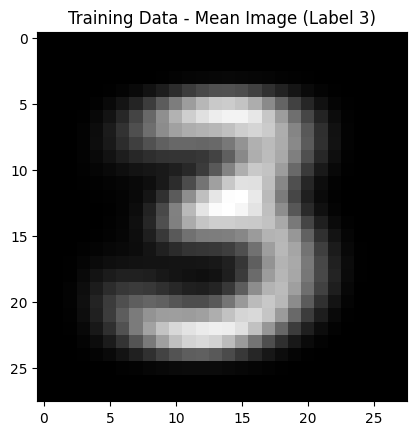

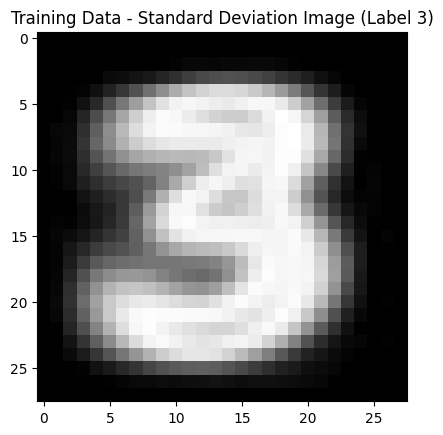

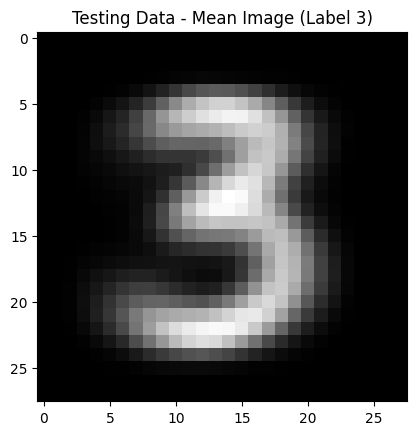

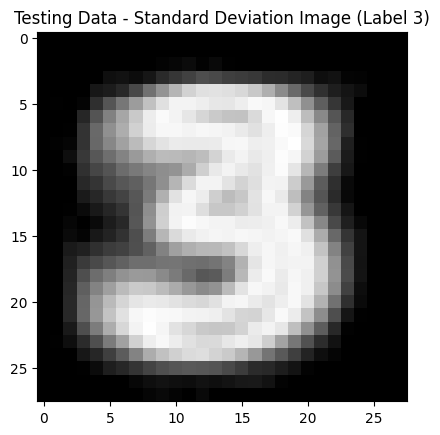

In [13]:
# Training
images_3 = x_train[y_train == 3]
mean_image_3 = np.mean(images_3, axis=0)
std_image_3 = np.std(images_3, axis=0)

plt.imshow(mean_image_3, cmap="gray")
plt.title("Training Data - Mean Image (Label 3)")
plt.show()

plt.imshow(std_image_3, cmap="gray")
plt.title("Training Data - Standard Deviation Image (Label 3)")
plt.show()

# Testing
images_test_3 = x_test[y_test == 3]
mean_image_test_3 = np.mean(images_test_3, axis=0)
std_image_test_3 = np.std(images_test_3, axis=0)

plt.imshow(mean_image_test_3, cmap="gray")
plt.title("Testing Data - Mean Image (Label 3)")
plt.show()

plt.imshow(std_image_test_3, cmap="gray")
plt.title("Testing Data - Standard Deviation Image (Label 3)")
plt.show()

*Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.*

**Ans**: Similar to when plotting for images in category 3, the actual difference is small, likely indicating that training and testing dataset has relatively similar distribution patterns, resulting in similar mean and median values. 

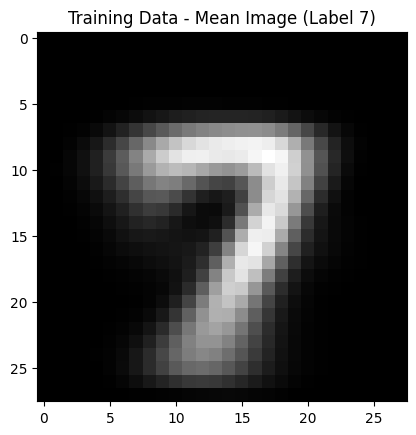

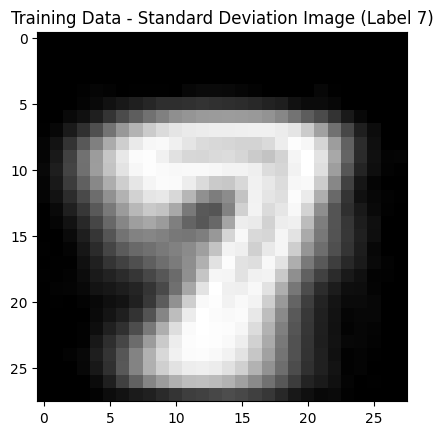

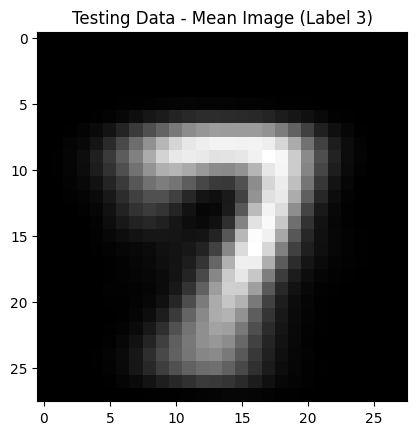

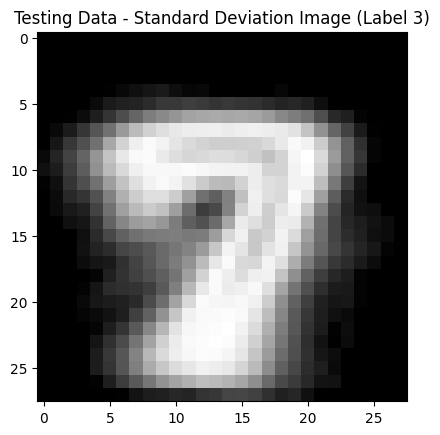

In [14]:
# Training

images_7 = x_train[y_train == 7]
mean_image_7 = np.mean(images_7, axis=0)
std_image_7 = np.std(images_7, axis=0)

plt.imshow(mean_image_7, cmap="gray")
plt.title("Training Data - Mean Image (Label 7)")
plt.show()

plt.imshow(std_image_7, cmap="gray")
plt.title("Training Data - Standard Deviation Image (Label 7)")
plt.show()

# Testing
images_test_7 = x_test[y_test == 7]
mean_image_test_7 = np.mean(images_test_7, axis=0)
std_image_test_7 = np.std(images_test_7, axis=0)

plt.imshow(mean_image_test_7, cmap="gray")
plt.title("Testing Data - Mean Image (Label 3)")
plt.show()

plt.imshow(std_image_test_7, cmap="gray")
plt.title("Testing Data - Standard Deviation Image (Label 3)")
plt.show()

*Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.*

**Ans**: We interpreted "both of the images" referring to the "**single, pixel-wise average image of all of the (training) images**" from the previous section. Please find the visualizations below.

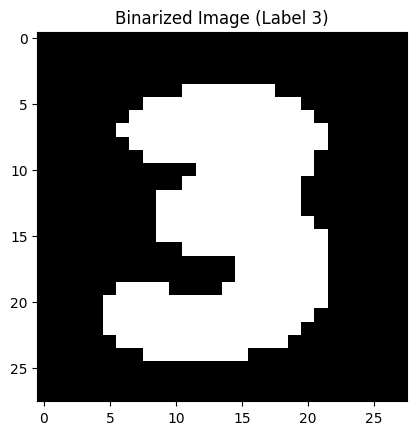

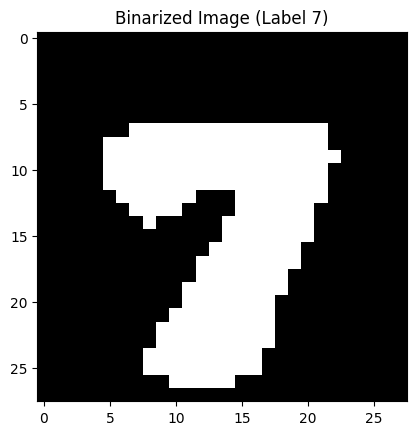

In [15]:
binary_image_3 = (mean_image_3 > np.mean(mean_image_3)).astype(int)
plt.imshow(binary_image_3, cmap="gray")
plt.title("Binarized Image (Label 3)")
plt.show()

binary_image_7 = (mean_image_7 > np.mean(mean_image_7)).astype(int)
plt.imshow(binary_image_7, cmap="gray")
plt.title("Binarized Image (Label 7)")
plt.show()

*In plain English, what are we actually **doing** when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?*

**Ans**: When we binarize an image, we convert the pixel values from a continuous range to 0 and 1 based on the threshold. In this case, when a pixel value is greater than the mean value for that pixel across all images with that label, we set it to the new value "1"; if a pixel value is smaller than the mean value for that pixel across all images with that label, we set it to the new value "0". 

*What is the index of the most **dissimilar** image in category "3" in the training set for the regular images? What about the most **similar** image?* 

In [16]:
# Function to calculate pairwise distances between all images
def calculate_distances(images):
    num_images = images.shape[0]
    distances = np.zeros((num_images, num_images))
    for i in range(num_images):
        for j in range(i + 1, num_images):  # Only calculate for upper triangle
            distances[i, j] = euclidean(images[i].flatten(), images[j].flatten())
    return distances

# Compute pairwise distances
distances = calculate_distances(images_3)

# Get the indices of the most similar and most dissimilar images
most_similar = np.unravel_index(np.argmin(distances + np.eye(distances.shape[0]) * 1e10), distances.shape)  # Ignore diagonal
most_dissimilar = np.unravel_index(np.argmax(distances), distances.shape)

print("Most similar pair indices:", most_similar)
print("Most dissimilar pair indices:", most_dissimilar)

Most similar pair indices: (1, 0)
Most dissimilar pair indices: (3023, 3263)


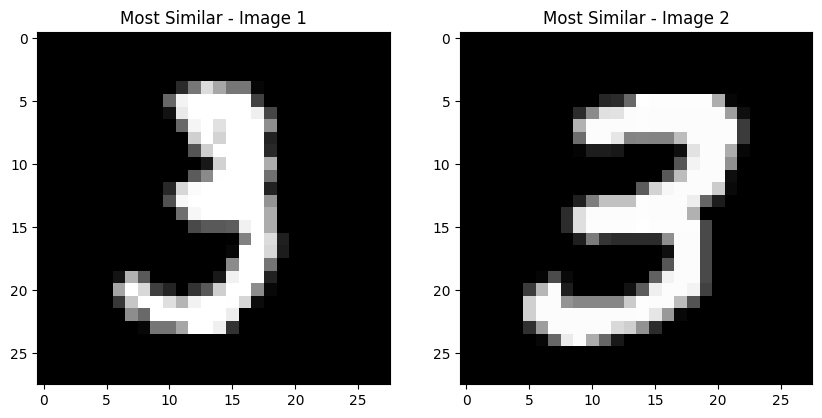

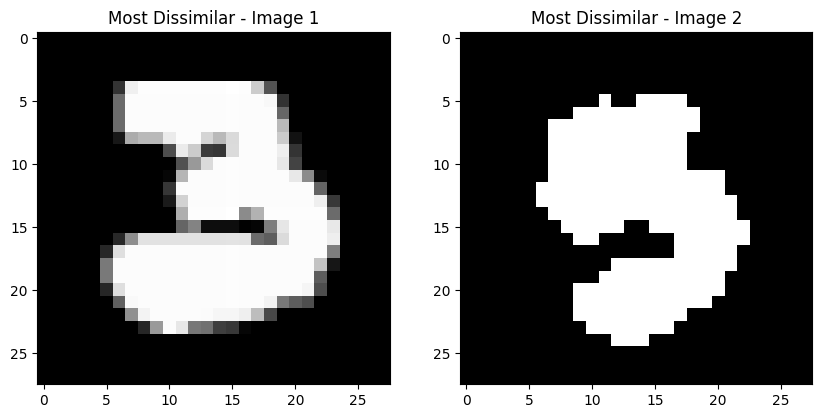

In [17]:
# Plot most similar images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_3[most_similar[0]], cmap="gray")
plt.title("Most Similar - Image 1")
plt.subplot(1, 2, 2)
plt.imshow(images_3[most_similar[1]], cmap="gray")
plt.title("Most Similar - Image 2")
plt.show()

# Plot most dissimilar images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_3[most_dissimilar[0]], cmap="gray")
plt.title("Most Dissimilar - Image 1")
plt.subplot(1, 2, 2)
plt.imshow(images_3[most_dissimilar[1]], cmap="gray")
plt.title("Most Dissimilar - Image 2")
plt.show()

*Does this change for the binarized images? If so, why?*

**Ans**: Yes, it changed for the binarized images. This is because binarization neglects pixel intensity information (relative "weight" of the pixel), and each pixel value is simplified to a a binary representation of 0 versus 1. This shifts the focus from intensity-based differences to shape-based differences, therefore changing the similarity rankings.

In [18]:
# Binarize images
binarized_images_3 = (images_3 > np.mean(images_3)).astype(int)

# Repeat distance calculation for binarized images
distances_binarized = calculate_distances(binarized_images_3)

# Find most similar and dissimilar for binarized images
most_similar_binarized = np.unravel_index(np.argmin(distances_binarized + np.eye(distances_binarized.shape[0]) * 1e10), distances_binarized.shape)
most_dissimilar_binarized = np.unravel_index(np.argmax(distances_binarized), distances_binarized.shape)

print("Most similar pair (binarized):", most_similar_binarized)
print("Most dissimilar pair (binarized):", most_dissimilar_binarized)

Most similar pair (binarized): (1, 0)
Most dissimilar pair (binarized): (1450, 4852)


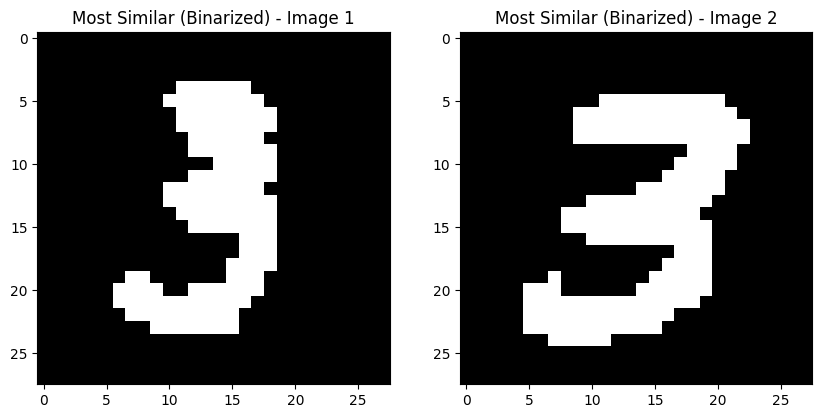

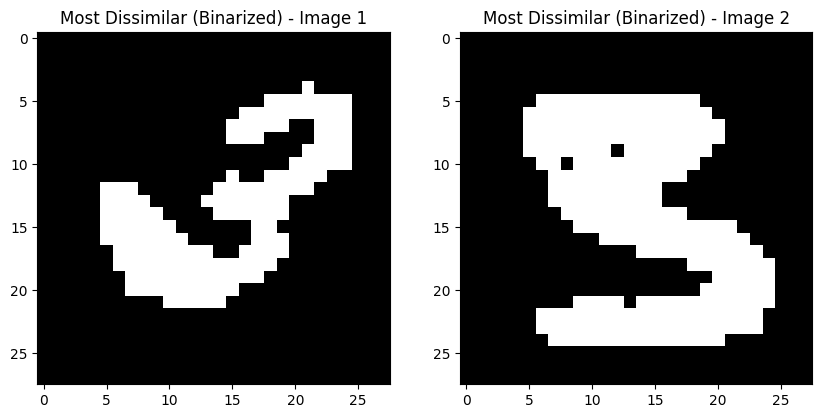

In [19]:
# Plot most similar binarized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binarized_images_3[most_similar_binarized[0]], cmap="gray")
plt.title("Most Similar (Binarized) - Image 1")
plt.subplot(1, 2, 2)
plt.imshow(binarized_images_3[most_similar_binarized[1]], cmap="gray")
plt.title("Most Similar (Binarized) - Image 2")
plt.show()

# Plot most dissimilar binarized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binarized_images_3[most_dissimilar_binarized[0]], cmap="gray")
plt.title("Most Dissimilar (Binarized) - Image 1")
plt.subplot(1, 2, 2)
plt.imshow(binarized_images_3[most_dissimilar_binarized[1]], cmap="gray")
plt.title("Most Dissimilar (Binarized) - Image 2")
plt.show()

*What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?*

**Ans**: Binarizing the images can help simplify the data, remove noises, and make general / global patterns more pronounced. Therefore, binarization helps standardize the data into a uniform format easier for machine learning. However, binarization also risks lossing of nuances and conclusions (such as the similarity of sample) is heavily subject to the set threshold, making it prone to subjective errors.

*How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?*

**Ans**: Binarization standardizes data be simplifying pixel values to a consistent range (either 0 or 1). When scales vary across features, this helps to standardize the range and help models converge faster in the learning process. 

*Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?*

**Ans**: Understanding the mean helps identify the "average" appearance of a feature (such as the value of a particular pixel). Understanding the standard deviation, on the other hand, helps identify the variation of data from the mean. A high standard deviation corresponds to greater variation in that pixel across the images, typically associated with greater range or skewness.

## 3. Model Training, Validation, and Intepretation

### 3.1 Support Vector Machine

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

*From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9.* 

In [21]:
subset_indices = (y_train == 3) | (y_train == 9)
x_train_39 = x_train[subset_indices].reshape(-1, 784) # flattening x_train_39 into a 2D array
y_train_39 = np.where(y_train[subset_indices] == 3, 0, 1) # labelling y as "0" for 3, and "1" for 9

# Splitting the data
x_train_set1, x_train_set2, y_train_set1, y_train_set2 = train_test_split(
    x_train_39, y_train_39, test_size=0.4, random_state=2
)

*Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?*

**Ans**: The model achieved 100% accuracy on the training dataset, meaning it classified all training samples correctly. However, this could indicate overfitting, where the model memorizes the training data instead of generalizing well. On the testing dataset, the accuracy is 97.64%, showing strong performance with minimal errors.

In [22]:
model = SVC(kernel="linear")
model.fit(x_train_set1, y_train_set1)

y_pred_set1 = model.predict(x_train_set1)
print(f"Accuracy on Set1 (training set): {accuracy_score(y_train_set1, y_pred_set1)}")


y_pred_set2 = model.predict(x_train_set2)
print(f"Accuracy on Set2 (testing set): {accuracy_score(y_train_set2, y_pred_set2)}")

Accuracy on Set1 (training set): 1.0
Accuracy on Set2 (testing set): 0.9764072847682119


### 3.2 Modeling with Engineered Data

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

*We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:*

- *Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.*
- *For each image row i, find n_i, the sum of 1's in the row (28 features).*
- *For each image column j, find n_j, the sum of 1's in the column (28 features).*
- *Concatenate these features to form a feature vector of 56 features.*

In [24]:
def extract_features(images):
    images = images.reshape(-1, 28, 28)  # Reshape back to 28x28
    binarized = (images > 128).astype(int)
    row_sums = binarized.sum(axis=1)  # Sum over rows (28 features)
    col_sums = binarized.sum(axis=2)  # Sum over columns (28 features)
    return np.hstack((row_sums, col_sums))  # Combine into 56 features

*What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set?* 

**Ans**: The prediction accuracy of the SVM model on the training set is 96.92% and on the testing set is 96.07%.

In [25]:
# Extract features for training and testing sets
x_train_features = extract_features(x_train_set1)
x_test_features = extract_features(x_train_set2)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train the SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(x_train_features, y_train_set1)

# Predict on the training set
y_pred_train = svm_model.predict(x_train_features)

# Compute training accuracy
train_accuracy = accuracy_score(y_train_set1, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on the testing set
y_pred_test = svm_model.predict(x_test_features)

# Compute testing accuracy
test_accuracy = accuracy_score(y_train_set2, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9692
Testing Accuracy: 0.9607


*How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?*

**Ans**: When k=3, the k-NN model achieved 98.44% accuracy on the training set and 97.00% on the testing set, showing strong performance with minimal overfitting. This suggests that the feature engineering process successfully preserved important information while reducing data complexity. The small accuracy drop between training and testing means the model generalizes well. The high performance of both k-NN and SVM indicates that the extracted features are effective for classification.

In [26]:
# Initialize and train k-NN classifier (choosing k=3 as an example)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_features, y_train_set1)

# Predict on the training set
y_pred_knn_train = knn_model.predict(x_train_features)

# Compute training accuracy
knn_train_accuracy = accuracy_score(y_train_set1, y_pred_knn_train)
print(f"k-NN Training Accuracy: {knn_train_accuracy:.4f}")

# Predict on the testing set
y_pred_knn_test = knn_model.predict(x_test_features)

# Compute testing accuracy
knn_test_accuracy = accuracy_score(y_train_set2, y_pred_knn_test)
print(f"k-NN Testing Accuracy: {knn_test_accuracy:.4f}")

k-NN Training Accuracy: 0.9844
k-NN Testing Accuracy: 0.9700


### 3.3 K-Nearest Neighbors

*In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.*

In [27]:
# Filter dataset to only include digits 1, 3, 5, 7, and 9
selected_indices = np.isin(y_train, [1, 3, 5, 7, 9])
x_train_filtered = x_train[selected_indices]
y_train_filtered = y_train[selected_indices]

selected_indices_test = np.isin(y_test, [1, 3, 5, 7, 9])
x_test_filtered = x_test[selected_indices_test]
y_test_filtered = y_test[selected_indices_test]

# Extract features
x_train_features = extract_features(x_train_filtered)
x_test_features = extract_features(x_test_filtered)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Test k values from 4 to 40 (step size = 4)
k_values = range(4, 41, 4)
accuracy_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_features, y_train_filtered)

    # Predict on the test set
    y_pred = knn.predict(x_test_features)

    # Compute accuracy
    accuracy = accuracy_score(y_test_filtered, y_pred)
    accuracy_results[k] = accuracy
    print(f"k = {k}, Accuracy: {accuracy:.4f}")

k = 4, Accuracy: 0.8930
k = 8, Accuracy: 0.8918
k = 12, Accuracy: 0.8926
k = 16, Accuracy: 0.8871
k = 20, Accuracy: 0.8831
k = 24, Accuracy: 0.8810
k = 28, Accuracy: 0.8786
k = 32, Accuracy: 0.8747
k = 36, Accuracy: 0.8713
k = 40, Accuracy: 0.8693


*For k = 4, what is the label that was predicted with lowest accuracy?*

**Ans**: Label 2

*For k = 20, what is the label that was predicted with lowest accuracy?*

**Ans**: Label 2

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

def get_lowest_accuracy_label(knn_model, x_test_features, y_test_filtered):
    """Finds the label with the lowest accuracy using confusion matrix."""
    y_pred = knn_model.predict(x_test_features)
    cm = confusion_matrix(y_test_filtered, y_pred)

    # Compute per-class accuracy
    per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

    # Identify the label with the lowest accuracy
    lowest_accuracy_label = np.argmin(per_class_accuracy)
    
    return lowest_accuracy_label, per_class_accuracy

# Evaluate for k=4
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(x_train_features, y_train_filtered)
lowest_label_4, acc_4 = get_lowest_accuracy_label(knn_4, x_test_features, y_test_filtered)
print(f"For k = 4, the label predicted with the lowest accuracy: {lowest_label_4}")

# Evaluate for k=20
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(x_train_features, y_train_filtered)
lowest_label_20, acc_20 = get_lowest_accuracy_label(knn_20, x_test_features, y_test_filtered)
print(f"For k = 20, the label predicted with the lowest accuracy: {lowest_label_20}")

For k = 4, the label predicted with the lowest accuracy: 2
For k = 20, the label predicted with the lowest accuracy: 2


*What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?*

**Ans**: The label pair that was confused most often is (2, 1), meaning that Class 2 was frequently misclassified as 1 and similarly, class 1 was often mistaken for 2.

In [30]:
from sklearn.metrics import confusion_matrix

# Choose specific k values (e.g., k=4 and k=20)
for k in [4, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_features, y_train_filtered)
    y_pred = knn.predict(x_test_features)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_filtered, y_pred)
    print(f"Confusion Matrix for k={k}:\n", cm)

    # Identify the label with the lowest accuracy
    per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
    lowest_accuracy_label = np.argmin(per_class_accuracy)
    print(f"Lowest accuracy label for k={k}: {lowest_accuracy_label}")

# Find the most confused label pair
most_confused_pair = np.unravel_index(np.argmax(cm - np.diag(np.diag(cm))), cm.shape)
print(f"Most confused label pair: {most_confused_pair}")

Confusion Matrix for k=4:
 [[1129    4    2    0    0]
 [  35  893   41   31   10]
 [  32  171  647   30   12]
 [  34   16    8  929   41]
 [  30   22    6   18  933]]
Lowest accuracy label for k=4: 2
Confusion Matrix for k=20:
 [[1130    4    1    0    0]
 [  49  871   34   37   19]
 [  46  148  639   40   19]
 [  47    4    5  907   65]
 [  35   23    5   12  934]]
Lowest accuracy label for k=20: 2
Most confused label pair: (2, 1)


*Visualize 5 mislabeled samples with their actual and predicted labels.*

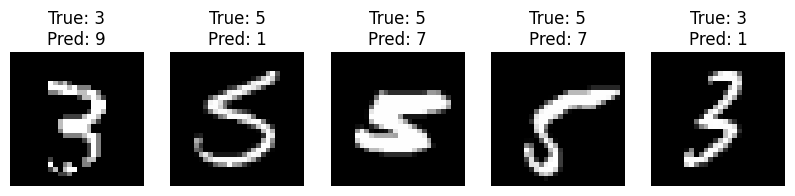

In [31]:
import matplotlib.pyplot as plt

# Get misclassified samples
misclassified_indices = np.where(y_test_filtered != y_pred)[0]

# Select 5 random misclassified samples
np.random.seed(2)
sample_indices = np.random.choice(misclassified_indices, 5, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_filtered[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_filtered[index]}\nPred: {y_pred[index]}")
    plt.axis('off')
plt.show()

*Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.*

**Ans**: The model struggles to distinguish between labels with similar shapes and pixel patterns, like 2 and 1, because their structures overlap. Digits with curves and loops, such as 3, 5, 6, 8, and 9, are also harder to separate. Handwriting variations can make some numbers look alike, such as 1 and 7 or 3 and 5. Since the model reduces image details by summing row and column pixel values, fine differences are lost, making it harder for k-NN to differentiate similar-looking digits. A better approach might be using deep learning models like CNNs, which can recognize detailed spatial features more effectively.

### 3.4 Comprehension Questions

*Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?*

**Ans**: Having separate training and testing datasets ensures that the model is evaluated on unseen data, giving a realistic measure of its generalization ability. If the same data is used for both training and testing, the model may simply memorize the training data rather than learning meaningful patterns. This can lead to overfitting, where the model performs well on the training set but fails to generalize to new data.

*If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?*

**Ans**: A high training accuracy but a significantly lower testing accuracy suggests overfitting. This means the model has learned the training data too well, including noise or minor details, but struggles with new data. To improve generalization, techniques like regularization, increasing training data, or using a simpler model can be applied.